# inmport necessary Libraries

In [4]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import  layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [5]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [8]:
from keras.utils.np_utils import to_categorical #  used for converting labels to one-hot-encoding

In [9]:
from sklearn.preprocessing import LabelEncoder

# Read The DataSet

In [6]:
ds=pd.read_csv("HAM10000_metadata.csv")

In [7]:
ds.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [26]:
ds.set_index("image_id")

,lesion_id,dx,dx_type,age,sex,localization
image_id,,,,,,
ISIC_0027419,HAM_0000118,bkl,histo,80.0,male,scalp
ISIC_0025030,HAM_0000118,bkl,histo,80.0,male,scalp
ISIC_0026769,HAM_0002730,bkl,histo,80.0,male,scalp
ISIC_0025661,HAM_0002730,bkl,histo,80.0,male,scalp
ISIC_0031633,HAM_0001466,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...
ISIC_0033084,HAM_0002867,akiec,histo,40.0,male,abdomen
ISIC_0033550,HAM_0002867,akiec,histo,40.0,male,abdomen
ISIC_0033536,HAM_0002867,akiec,histo,40.0,male,abdomen


# Split the data ( train , test )

In [38]:
X = ds.drop(['dx'],axis=1).values   # independant features
y = ds['dx'].values

In [39]:
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.25, random_state=42)

In [40]:
# shape of all data 
ds.shape


(10015, 7)

In [41]:
# x_train shape 
x_train.shape

(7511, 6)

In [42]:
y_train.shape

(7511,)

In [43]:
# x_test shape
x_test.shape

(2504, 6)

In [44]:
y_test.shape

(2504,)

# Label Encode 

In [60]:
ds.dx

0          bkl
1          bkl
2          bkl
3          bkl
4          bkl
         ...  
10010    akiec
10011    akiec
10012    akiec
10013    akiec
10014      mel
Name: dx, Length: 10015, dtype: object

In [61]:
le = LabelEncoder()
le.fit(ds['dx'])
LabelEncoder()
print(list(le.classes_))

['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']


In [62]:
ds['label'] = le.transform(ds["dx"]) 
print(ds.sample(10))

        lesion_id      image_id   dx    dx_type   age     sex  \
1319  HAM_0000210  ISIC_0024624  mel      histo  75.0  female   
4288  HAM_0000293  ISIC_0030154   nv  follow_up  55.0    male   
6653  HAM_0006795  ISIC_0031892   nv  follow_up  55.0  female   
282   HAM_0004141  ISIC_0030705  bkl      histo  50.0  female   
7714  HAM_0002908  ISIC_0032650   nv      histo  65.0    male   
5171  HAM_0006068  ISIC_0024591   nv  follow_up  35.0    male   
2205  HAM_0005724  ISIC_0030032  mel      histo  75.0    male   
8192  HAM_0000182  ISIC_0025096   nv      histo  60.0    male   
3942  HAM_0001346  ISIC_0026928   nv  follow_up  55.0  female   
6529  HAM_0004999  ISIC_0027690   nv  follow_up  40.0    male   

         localization  label  
1319             face      4  
4288          abdomen      5  
6653             back      5  
282              back      2  
7714             back      5  
5171             back      5  
2205  upper extremity      4  
8192             neck      5  
3942 

# Visualize The Data

In [90]:
import seaborn as sns
from scipy import stats

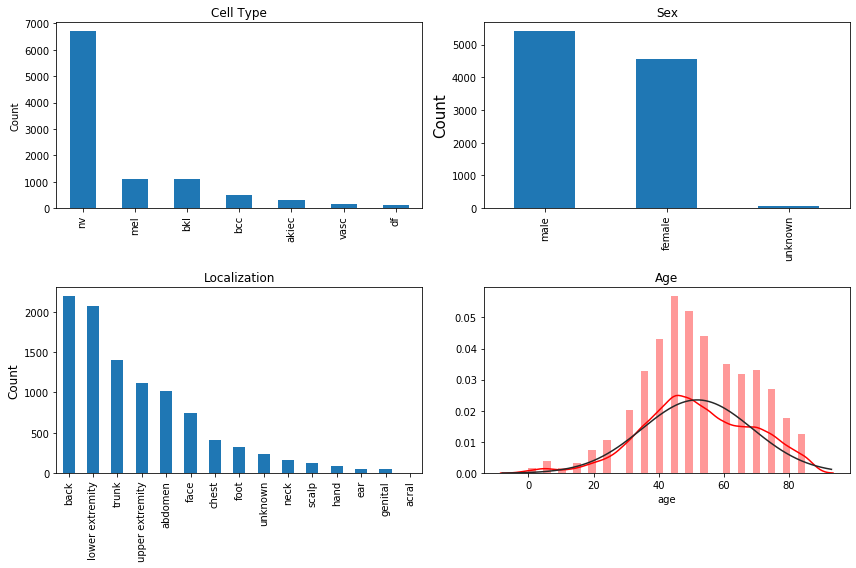

In [91]:
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(221)
ds['dx'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Cell Type');

ax2 = fig.add_subplot(222)
ds['sex'].value_counts().plot(kind='bar', ax=ax2)
ax2.set_ylabel('Count', size=15)
ax2.set_title('Sex');

ax3 = fig.add_subplot(223)
ds['localization'].value_counts().plot(kind='bar')
ax3.set_ylabel('Count',size=12)
ax3.set_title('Localization')

ax4 = fig.add_subplot(224)
sample_age = ds[pd.notnull(ds['age'])]
sns.distplot(sample_age['age'], fit=stats.norm, color='red');
ax4.set_title('Age')

plt.tight_layout()
plt.show()

# Data preprocessing

In [94]:
print(ds['label'].value_counts())

5    6705
4    1113
2    1099
1     514
0     327
6     142
3     115
Name: label, dtype: int64


In [95]:
ds.isna().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
label            0
dtype: int64

In [96]:
#filling the nan ages with mean value
ds['age'] = ds['age'].fillna(value = ds['age'].mean())


In [97]:
ds.isna().sum()

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
label           0
dtype: int64

# <h>     ####################################     </h>

In [10]:
df=pd.read_csv('hmnist_28_28_RGB.csv')
df.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


In [11]:
x=df.drop('label',axis=1)
y=df['label']
x=x.to_numpy()
x=x/255
y=to_categorical(y)

In [12]:
#Since there are 7 classes only, we can label them manually 
label={
    ' Actinic keratoses':0,
    'Basal cell carcinoma':1,
    'Benign keratosis-like lesions':2,
    'Dermatofibroma':3,
    'Melanocytic nevi':4,
    'Melanoma':6,
    'Vascular lesions':5
}

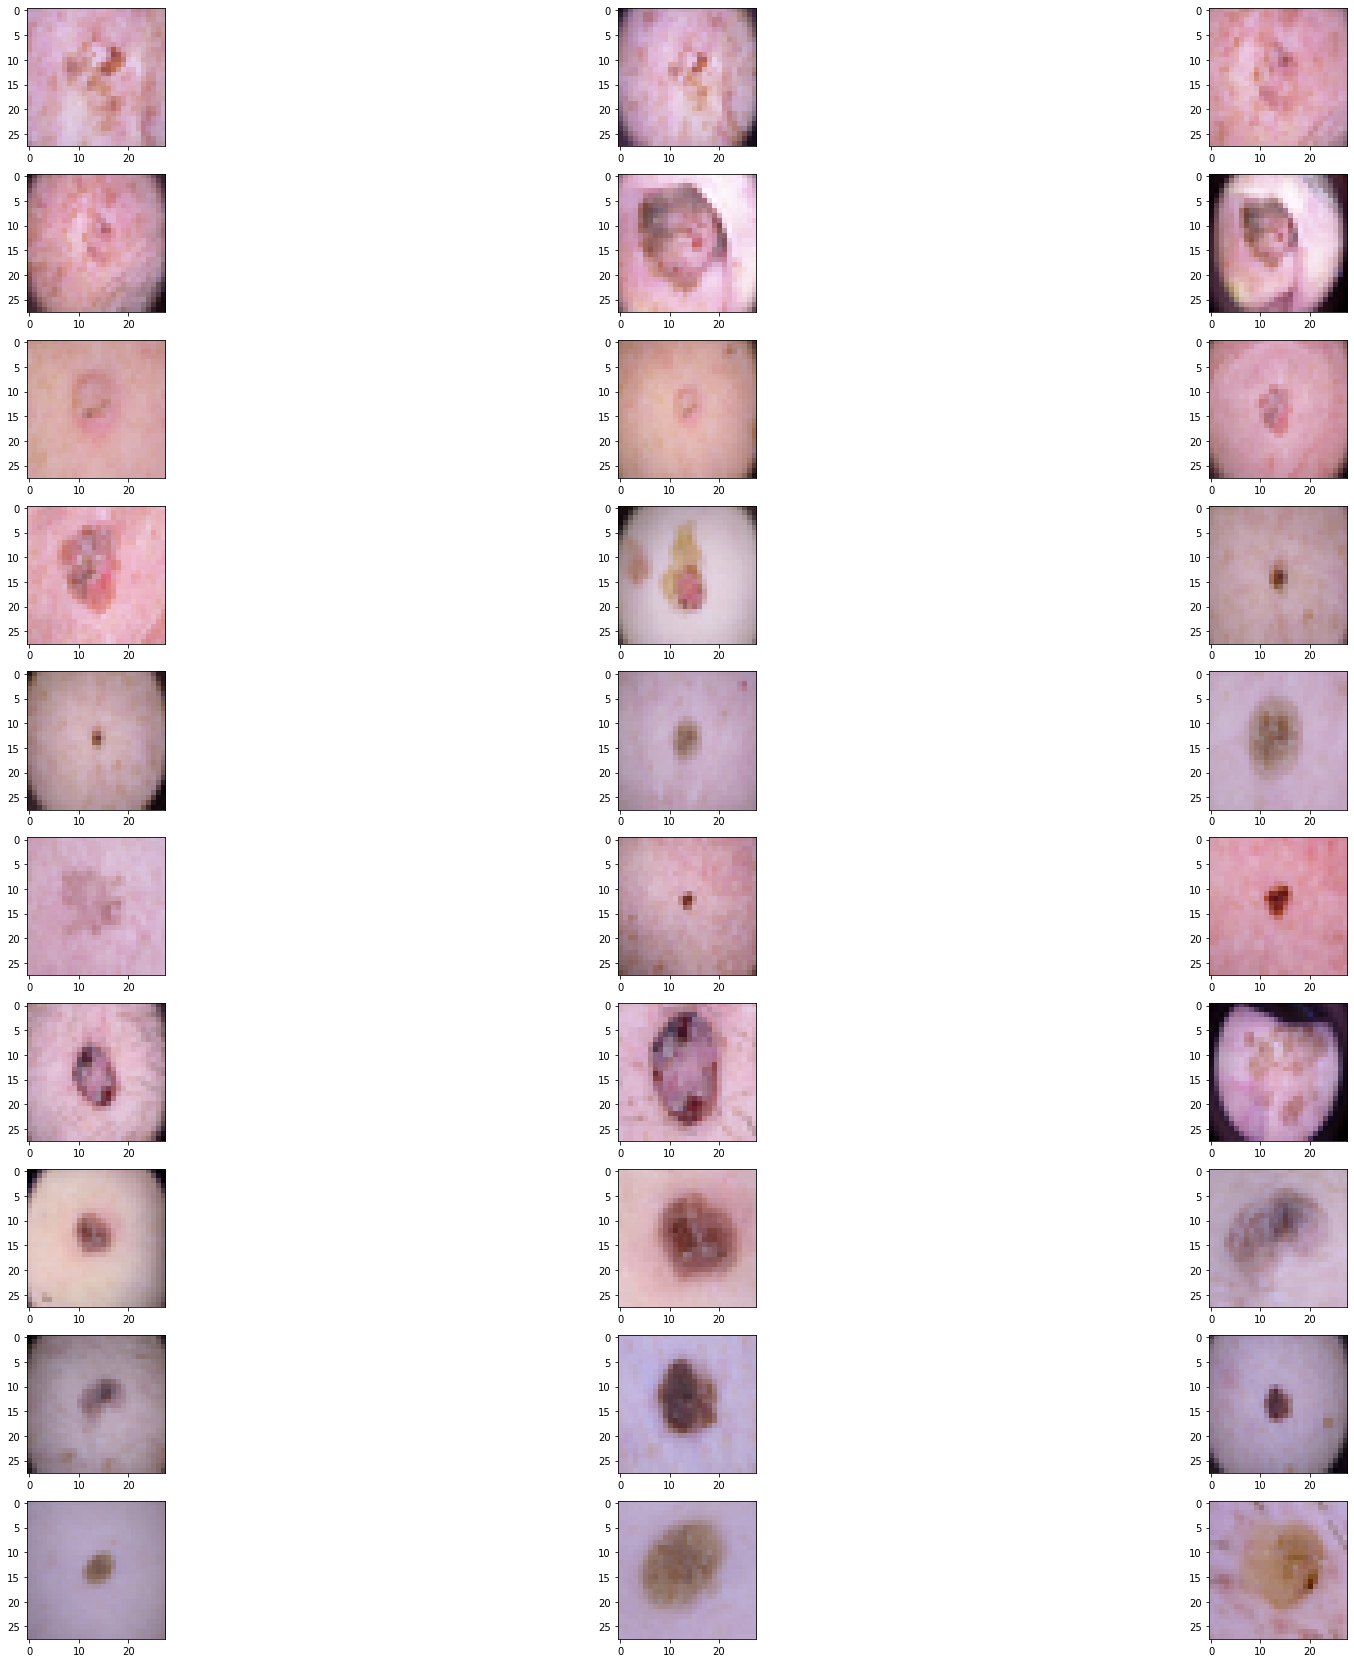

In [13]:
x=x.reshape(-1,28,28,3)
plt.figure(figsize=(30,30))
for i in range(30):
    plt.subplot(10,3,i+1)
    img=x[i]
    plt.imshow(img)

splitting data set

In [17]:
trainx,testx,trainy,testy = train_test_split(x,y,test_size=0.25
                                             ,random_state=42)



# CNN MODEL

In [20]:
model=models.Sequential()

model.add(layers.Conv2D(64,(2,2),input_shape=(28,28,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(512,(2,2),input_shape=(28,28,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(1024,(2,2),input_shape=(28,28,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.BatchNormalization())

model.add(layers.Dropout(0.3))

model.add(layers.Flatten())

model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dropout(0.5))


model.add(layers.Dense(7,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 27, 27, 64)        832       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 13, 13, 64)        256       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 512)       131584    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 512)         0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 6, 6, 512)         2048      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 5, 5, 1024)       

In [21]:
model.fit(trainx, trainy, epochs=30)

Epoch 1/30
7511/7511 [==============================] - 278s 37ms/sample - loss: 1.3996 - acc: 0.6324
Epoch 2/30
7511/7511 [==============================] - 269s 36ms/sample - loss: 0.9064 - acc: 0.6935
Epoch 3/30
7511/7511 [==============================] - 263s 35ms/sample - loss: 0.8598 - acc: 0.7059
Epoch 4/30
7511/7511 [==============================] - 301s 40ms/sample - loss: 0.7816 - acc: 0.7196
Epoch 5/30
7511/7511 [==============================] - 271s 36ms/sample - loss: 0.7933 - acc: 0.7180
Epoch 6/30
7511/7511 [==============================] - 304s 40ms/sample - loss: 0.7578 - acc: 0.7264
Epoch 7/30
7511/7511 [==============================] - 387s 52ms/sample - loss: 0.7358 - acc: 0.7345
Epoch 8/30
7511/7511 [==============================] - 338s 45ms/sample - loss: 0.7181 - acc: 0.7328
Epoch 9/30
7511/7511 [==============================] - 276s 37ms/sample - loss: 0.6923 - acc: 0.7482
Epoch 10/30
7511/7511 [==============================] - 298s 40ms/sample - loss: 

In [23]:
model.evaluate(testx,testy)

2504/2504 [==============================] - 19s 8ms/sample - loss: 1.1173 - acc: 0.6733


[1.1173326418803522, 0.6733227]